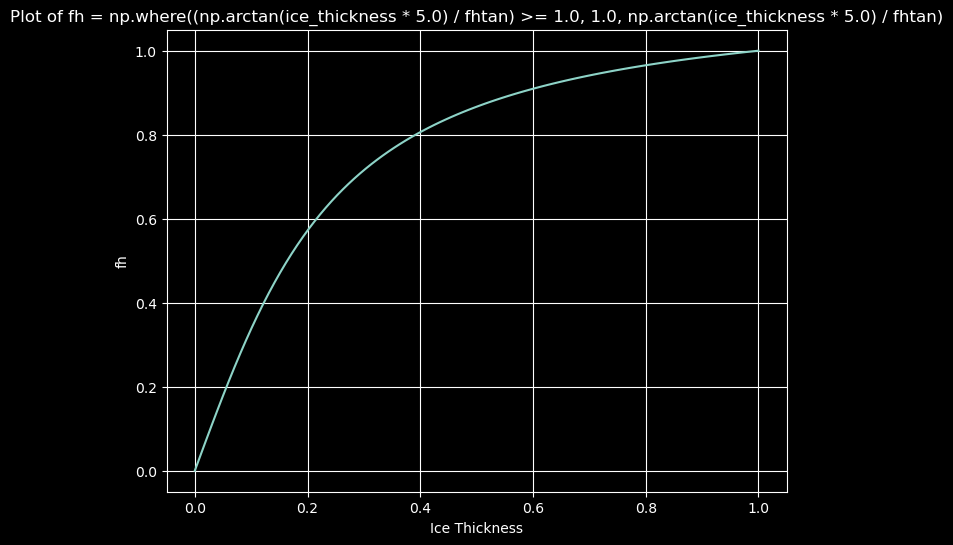

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define ahmax (maximum ice thickness)
ahmax = 1.0  

# Define ice_thickness as a numpy array from 0 to 1 with 100 points
ice_thickness = np.linspace(0, 1, 100)

# Calculate fhtan
fhtan = np.arctan(5 * ahmax)

# Calculate fh
fh = np.where((np.arctan(ice_thickness * 5.0) / fhtan) >= 1.0, 1.0, np.arctan(ice_thickness * 5.0) / fhtan)

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(ice_thickness, fh)
plt.xlabel('Ice Thickness')
plt.ylabel('fh')
plt.title('Plot of fh = np.where((np.arctan(ice_thickness * 5.0) / fhtan) >= 1.0, 1.0, np.arctan(ice_thickness * 5.0) / fhtan)')
plt.grid(True)
plt.show()


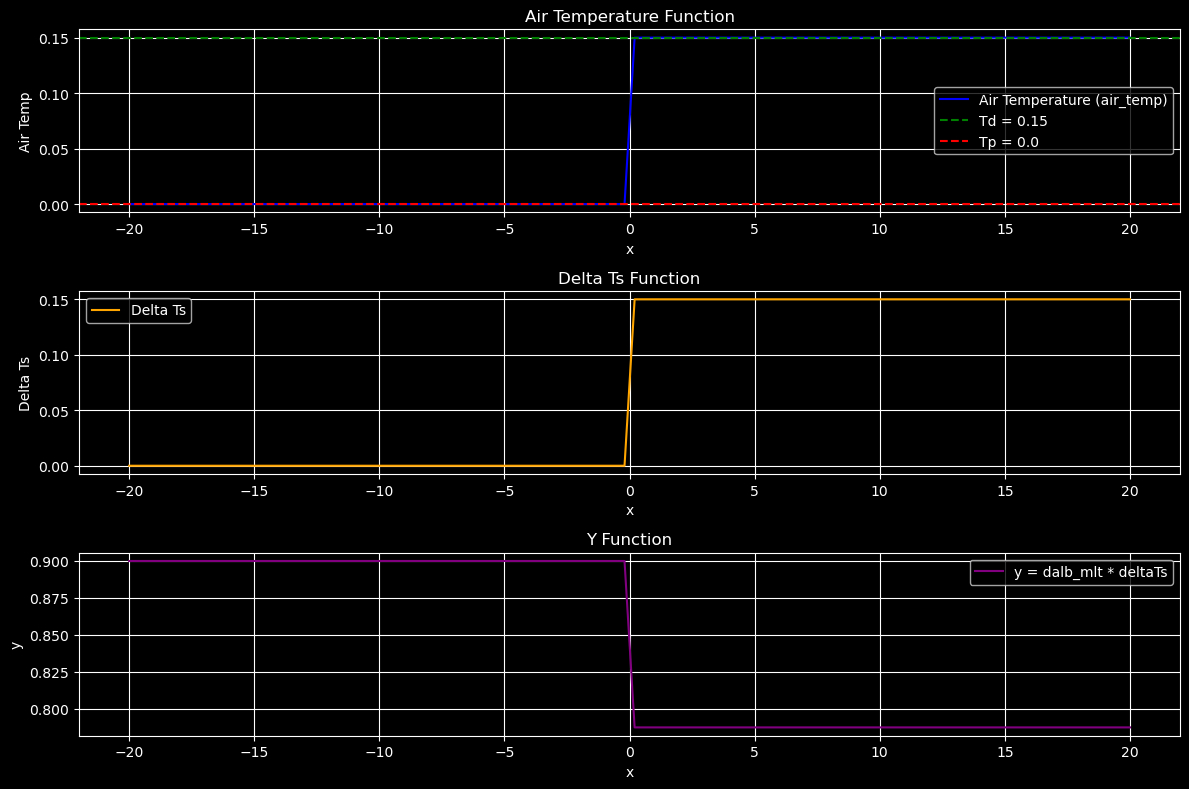

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

# Constants
Td = 0.15
Tp = 0.0
min_osa = 0.06
dalb_mlt = -0.75  # Example value for dalb_mlt

# Creating sample data for air_temp
x = np.linspace(-20, 20, 100)
air_temp = xr.DataArray(x)

# Applying the equations
air_temp = xr.where(air_temp > Td, Td, air_temp)
air_temp = xr.where(air_temp < Tp, Tp, air_temp)
deltaTs = air_temp

y = 0.90
y += dalb_mlt * deltaTs

y = xr.where(y < min_osa, min_osa, y)
# Plotting
plt.figure(figsize=(12, 8))

# Plot air_temp
plt.subplot(3, 1, 1)
plt.plot(x, air_temp, label='Air Temperature (air_temp)', color='blue')
plt.axhline(y=Td, color='green', linestyle='--', label='Td = 0.15')
plt.axhline(y=Tp, color='red', linestyle='--', label='Tp = 0.0')
plt.title('Air Temperature Function')
plt.xlabel('x')
plt.ylabel('Air Temp')
plt.legend()
plt.grid()

# Plot deltaTs
plt.subplot(3, 1, 2)
plt.plot(x, deltaTs, label='Delta Ts', color='orange')
plt.title('Delta Ts Function')
plt.xlabel('x')
plt.ylabel('Delta Ts')
plt.legend()
plt.grid()

# Plot y
plt.subplot(3, 1, 3)
plt.plot(x, y, label='y = dalb_mlt * deltaTs', color='purple')
plt.title('Y Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

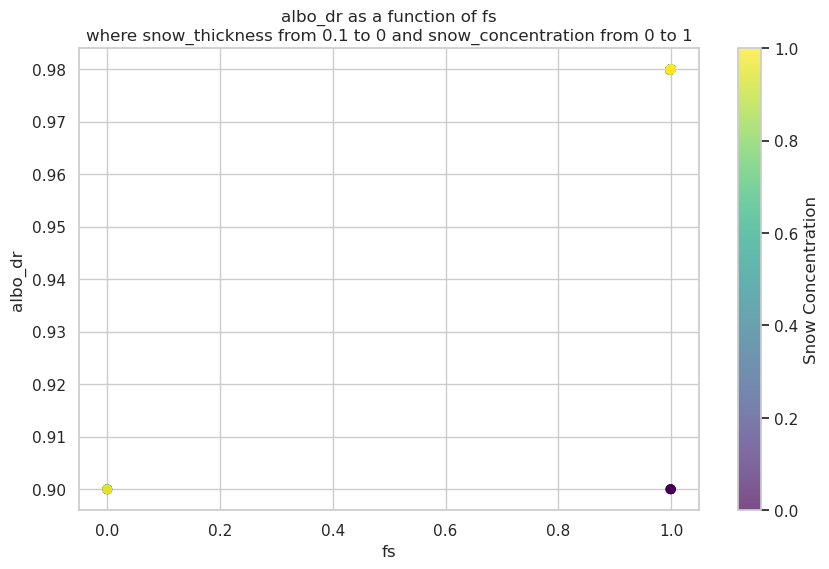

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

# Constants
albsnowv = 0.98
osa = 0.9

# Parameters
snow_thicknesses = np.linspace(0, 0.1, num=10)
snow_concentrations = np.linspace(0, 1, num=10)
snowpatch = 0.00002  # Assuming a snowpatch thickness of 1 for normalization

# Calculate fs and albo_dr
fs_values = snow_thicknesses / (snow_thicknesses + snowpatch)

# Create a meshgrid for calculations
fs_mesh, snow_concentration_mesh = np.meshgrid(fs_values, snow_concentrations)

# Calculate albo_dr
albo_dr = np.where(snow_concentration_mesh > 0.0, osa * (1 - fs_mesh) + fs_mesh * albsnowv, osa)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(fs_mesh.flatten(), albo_dr.flatten(), c=snow_concentration_mesh.flatten(), cmap='viridis', alpha=0.7)
plt.colorbar(label='Snow Concentration')
plt.title('albo_dr as a function of fs\nwhere snow_thickness from 0.1 to 0 and snow_concentration from 0 to 1')
plt.xlabel('fs')
plt.ylabel('albo_dr')
plt.grid(True)
plt.show()

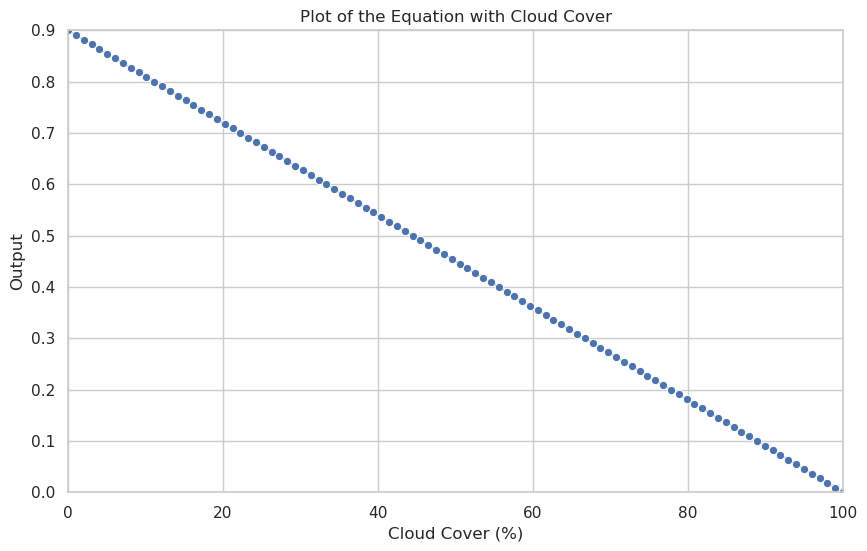

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Given parameters
offset = 0.9

# Sample cloud cover data
cloud_cover = np.linspace(0, 100, 100)  # Create an array of cloud cover values from 0 to 100

# Calculate the output based on the equation
output = ((100.0 - cloud_cover) / 100.0) * offset

# Plotting using Seaborn
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(x=cloud_cover, y=output, marker='o')
plt.title('Plot of the Equation with Cloud Cover')
plt.xlabel('Cloud Cover (%)')
plt.ylabel('Output')
plt.xlim(0, 100)
plt.ylim(0, offset)
plt.grid(visible=True)
plt.show()

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(mu):
    #return 0.058 / (mu + 0.30)
    return 0.037 / (1.1 * mu**1.4 + 0.15)

# Generate values for µ from 0 to 100
mu_values = np.cos(np.linspace(0, 90, 1000))

# Compute the function values
f_values = f(mu_values)
print(mu_values)
# Plot the function
plt.figure(figsize=(10, 6))
plt.plot(mu_values, f_values, label=r'$f(\mu) = \frac{0.037}{1.1 \mu^{1.4} + 0.15}$')
plt.xlabel(r'$\mu$')
plt.ylabel(r'$f(\mu)$')
plt.title('Plot of the function $f(\mu) = \frac{0.037}{1.1 \mu^{1.4} + 0.15}$')
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipykernel_50415/1832275991.py:7: RuntimeWarning: invalid value encountered in power
  return 0.037 / (1.1 * mu**1.4 + 0.15)


[ 1.00000000e+00  9.95944632e-01  9.83811419e-01  9.63698772e-01
  9.35769817e-01  9.00251081e-01  8.57430645e-01  8.07655815e-01
  7.51330302e-01  6.88910947e-01  6.20904016e-01  5.47861097e-01
  4.70374621e-01  3.89073060e-01  3.04615831e-01  2.17687942e-01
  1.28994445e-01  3.92547068e-02 -5.08034156e-02 -1.40449485e-01
 -2.28956405e-01 -3.15606321e-01 -3.99696437e-01 -4.80544720e-01
 -5.57495432e-01 -6.29924445e-01 -6.97244307e-01 -7.58909005e-01
 -8.14418391e-01 -8.63322245e-01 -9.05223919e-01 -9.39783561e-01
 -9.66720867e-01 -9.85817354e-01 -9.96918136e-01 -9.99933178e-01
 -9.94838026e-01 -9.81674005e-01 -9.60547884e-01 -9.31631013e-01
 -8.95157929e-01 -8.51424454e-01 -8.00785301e-01 -7.43651188e-01
 -6.80485517e-01 -6.11800607e-01 -5.38153544e-01 -4.60141660e-01
 -3.78397687e-01 -2.93584631e-01 -2.06390387e-01 -1.17522165e-01
 -2.77007519e-02  6.23453348e-02  1.51885755e-01  2.40194270e-01
  3.26554632e-01  4.10266396e-01  4.90650597e-01  5.67055261e-01
  6.38860689e-01  7.05484

ValueError: 
Plot of the function $f(\mu) = rac{0.037}{1.1 \mu^{1.4} + 0.15}$
                     ^
ParseException: Expected end of text, found '$'  (at char 21), (line:1, col:22)

<Figure size 1000x600 with 1 Axes>

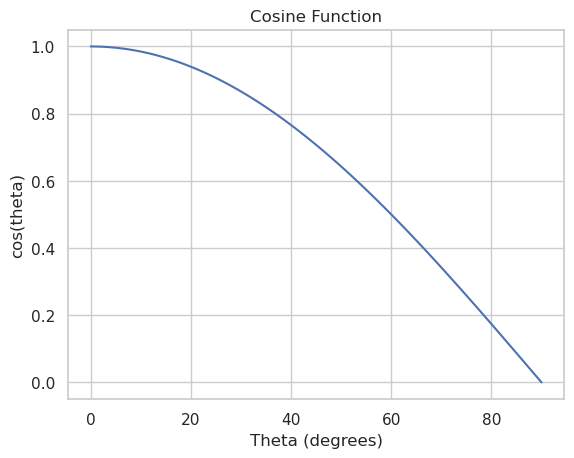

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Generate theta values from 0 to 90 degrees, converted to radians
theta = np.linspace(0, np.pi/2, 100)  # 0 to 90 degrees in radians

# Calculate the cosine of each theta value
cos_values = np.cos(theta)

# Plot the cosine function
plt.plot(theta * (180/np.pi), cos_values)  # Convert radians to degrees for the x-axis
plt.title('Cosine Function')
plt.xlabel('Theta (degrees)')
plt.ylabel('cos(theta)')
plt.grid(True)
plt.show()


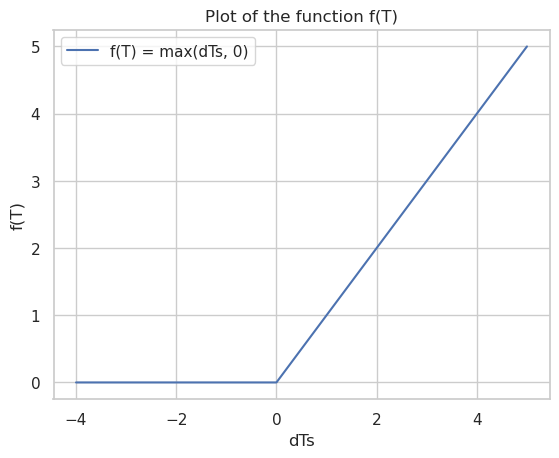

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range for dTs
dTs = np.linspace(-4, 5, 100)

# Since dT_melt is 0.0, the function simplifies to max(dTs, 0)
fT = np.maximum(dTs, 0)

# Plot the function
plt.plot(dTs, fT, label='f(T) = max(dTs, 0)')
plt.xlabel('dTs')
plt.ylabel('f(T)')
plt.title('Plot of the function f(T)')
plt.legend()
plt.grid(True)
plt.show()